# Marketing Campaign: Augmenter les bénéfices d’une campagne de marketing

# Part 3

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl
import matplotlib.cm as cm

#normalization
from sklearn import preprocessing
from sklearn import decomposition

#Models, tests
from sklearn.model_selection import train_test_split
import scipy.stats as st
import collections
from statsmodels.formula.api import ols
from scipy.stats import t, shapiro
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn import linear_model
import statsmodels as sm
from statsmodels.api import Logit
from statsmodels.tools import add_constant

from numpy import mean
from sklearn.model_selection import cross_val_score

#imblearn
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler

Mise en forme du Notebook

In [2]:
#Format des nombres:
pd.set_option('display.float_format', '{:.2f}'.format)

#Montrer toutes les colonnes:
pd.options.display.max_columns = None

## Table des matières

* [Télécharger le jeu de données](#chapter0)

* [4 Modelage et prédiction](#chapter4)

    * [4.1 Modèle avec toutes les variables](#section_4_1)
    
    * [4.2 Évaluation du modèle 0](#section_4_2)
        * [4.2.1 Matrice de confusion](#section_4_2_1)
        * [4.2.2 Courbe ROC et AUC](#section_4_2_2)
 
    * [4.3 Choix des variables significatives pour le modèle](#section_4_3)
        * [4.3.1 Chi-squared statistic test](#section_4_3_1)
        * [4.3.2 Stepwise selection](#section_4_3_2)
        * [4.3.3 mlxtend SequentialFeatureSelector](#section_4_3_3)
        
    * [4.4 Dernière modèle](#section_4_4)
        * [4.4.1 Model summary](#section_4_4_1)
        
    * [4.5 Évaluation du dernière modèle ](#section_4_5)
        * [4.5.1 Matrice de confusion](#section_4_5_1)
        * [4.5.2 Courbe ROC et AUC](#section_4_5_2)
        * [4.5.3 Test de significativité globale de la régression](#section_4_5_3)
        
    * [4.6 Explication du modèle par Shapley](#section_4_6)
    
    * [4.7 Taille du Train / Test split set](#section_4_7)

* [Annexes: Stratégies d’échantillonnage ](#chapterA)
    * [A1 SMOTE](#section_A_1)
    * [A2 Sampling Response 0 in 4](#section_A_2)

## Télécharger le jeu de données <a class="anchor" id="chapter0"></a>

In [3]:
df_mkt = pd.read_csv('~/Documents/Python/OpenClassrooms/Projet_8/outputs/df_cmkt.csv')

In [4]:
df_mkt

,ID,Age,Education,Marital_Status,Childhome,Income,Kidhome,Teenhome,Days_Engaged,Recency,MntTotal,Wines,Fruits,Meat,Fish,Sweets,Gold,TotalPurch,DealsPurch,WebPurch,CatalogPurch,StorePurch,NumWebVisitsMonth,TotalAcc,AccCmp3,AccCmp4,AccCmp5,AccCmp1,AccCmp2,Complain,Response
0,5524,58,Graduation,Single,0,58138.00,0,0,849,58,1617,635,88,546,172,88,88,22,3,8,10,4,7,0,0,0,0,0,0,0,1
1,2174,61,Graduation,Single,2,46344.00,1,1,299,38,27,11,1,6,2,1,6,4,2,1,1,2,5,0,0,0,0,0,0,0,0
2,4141,50,Graduation,Together,0,71613.00,0,0,498,26,776,426,49,127,111,21,42,20,1,8,2,10,4,0,0,0,0,0,0,0,0
3,6182,31,Graduation,Together,1,26646.00,1,0,325,26,53,11,4,20,10,3,5,6,2,2,0,4,6,0,0,0,0,0,0,0,0
4,5324,34,PhD,Married,1,58293.00,1,0,347,94,422,173,43,118,46,27,15,14,5,5,3,6,5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,10870,48,Graduation,Married,1,61223.00,0,1,567,46,1341,709,43,182,42,118,247,16,2,9,3,4,5,0,0,0,0,0,0,0,0
2198,4001,69,PhD,Together,3,64014.00,2,1,205,56,444,406,0,30,0,0,8,15,7,8,2,5,7,1,0,0,0,1,0,0,0
2199,7270,34,Graduation,Divorced,0,56981.00,0,0,341,91,1241,908,48,217,32,12,24,18,1,2,3,13,6,1,0,1,0,0,0,0,0
2200,8235,59,Master,Together,1,69245.00,0,1,342,8,843,428,30,214,80,30,61,21,2,6,5,10,3,0,0,0,0,0,0,0,0


In [5]:
df_mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2202 non-null   int64  
 1   Age                2202 non-null   int64  
 2   Education          2202 non-null   object 
 3   Marital_Status     2202 non-null   object 
 4   Childhome          2202 non-null   int64  
 5   Income             2202 non-null   float64
 6   Kidhome            2202 non-null   int64  
 7   Teenhome           2202 non-null   int64  
 8   Days_Engaged       2202 non-null   int64  
 9   Recency            2202 non-null   int64  
 10  MntTotal           2202 non-null   int64  
 11  Wines              2202 non-null   int64  
 12  Fruits             2202 non-null   int64  
 13  Meat               2202 non-null   int64  
 14  Fish               2202 non-null   int64  
 15  Sweets             2202 non-null   int64  
 16  Gold               2202 

In [6]:
df_mkt['ID'] = df_mkt['ID'].astype(str)
df_mkt.set_index('ID', inplace=True)

In [7]:
df_scaled = df_mkt.drop(['Response', 'AccCmp1', 'AccCmp2', 'AccCmp3', 'AccCmp4', 'AccCmp5',
                               'Complain'], 1)

df_targets = df_mkt[['Response', 'AccCmp1', 'AccCmp2', 'AccCmp3', 'AccCmp4', 'AccCmp5',
                     'Complain']]

for col in list(df_scaled.select_dtypes(exclude=['object']).columns):
    df_scaled.loc[:,col] = preprocessing.StandardScaler().fit_transform(np.array(df_scaled[col]).reshape(-1, 1)).flatten()
    
df_a = pd.concat([df_scaled, df_targets], axis=1)

df_ad = pd.get_dummies(df_a, columns=["Education", "Marital_Status"], drop_first=True).astype(float)
df_ad

,Age,Childhome,Income,Kidhome,Teenhome,Days_Engaged,Recency,MntTotal,Wines,Fruits,Meat,Fish,Sweets,Gold,TotalPurch,DealsPurch,WebPurch,CatalogPurch,StorePurch,NumWebVisitsMonth,TotalAcc,Response,AccCmp1,AccCmp2,AccCmp3,AccCmp4,AccCmp5,Complain,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1.02,-1.27,0.31,-0.82,-0.93,1.53,0.31,1.68,0.97,1.55,1.75,2.45,1.48,0.85,1.31,0.38,1.42,2.63,-0.57,0.71,-0.44,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
2174,1.27,1.40,-0.26,1.04,0.91,-1.19,-0.38,-0.97,-0.88,-0.64,-0.73,-0.65,-0.64,-0.74,-1.20,-0.16,-1.14,-0.59,-1.18,-0.13,-0.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
4141,0.33,-1.27,0.97,-0.82,-0.93,-0.21,-0.79,0.28,0.35,0.57,-0.18,1.33,-0.15,-0.04,1.03,-0.71,1.42,-0.23,1.29,-0.56,-0.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
6182,-1.29,0.07,-1.21,1.04,-0.93,-1.06,-0.79,-0.92,-0.88,-0.56,-0.67,-0.51,-0.59,-0.76,-0.92,-0.16,-0.77,-0.95,-0.57,0.29,-0.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
5324,-1.03,0.07,0.32,1.04,-0.93,-0.95,1.55,-0.31,-0.40,0.42,-0.22,0.15,-0.00,-0.56,0.20,1.48,0.33,0.13,0.05,-0.13,-0.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,0.16,0.07,0.46,-0.82,0.91,0.13,-0.10,1.22,1.19,0.42,0.08,0.08,2.21,3.92,0.48,-0.16,1.79,0.13,-0.57,-0.13,-0.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
4001,1.96,2.74,0.60,2.90,0.91,-1.66,0.24,-0.27,0.29,-0.66,-0.62,-0.69,-0.66,-0.70,0.34,2.57,1.42,-0.23,-0.26,0.71,1.03,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
7270,-1.03,-1.27,0.26,-0.82,-0.93,-0.98,1.45,1.05,1.78,0.54,0.24,-0.11,-0.37,-0.39,0.76,-0.71,-0.77,0.13,2.22,0.29,1.03,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00


In [8]:
#Changer to int

df_ad.iloc[:,21:] = df_ad.iloc[:,21:].astype(int)
df_ad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2202 entries, 5524 to 9405
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2202 non-null   float64
 1   Childhome                2202 non-null   float64
 2   Income                   2202 non-null   float64
 3   Kidhome                  2202 non-null   float64
 4   Teenhome                 2202 non-null   float64
 5   Days_Engaged             2202 non-null   float64
 6   Recency                  2202 non-null   float64
 7   MntTotal                 2202 non-null   float64
 8   Wines                    2202 non-null   float64
 9   Fruits                   2202 non-null   float64
 10  Meat                     2202 non-null   float64
 11  Fish                     2202 non-null   float64
 12  Sweets                   2202 non-null   float64
 13  Gold                     2202 non-null   float64
 14  TotalPurch               2

In [9]:
df_ad[df_ad.columns[:]].corr()['Response'][:]

Age                       -0.02
Childhome                 -0.17
Income                     0.17
Kidhome                   -0.08
Teenhome                  -0.16
Days_Engaged               0.20
Recency                   -0.20
MntTotal                   0.27
Wines                      0.25
Fruits                     0.12
Meat                       0.25
Fish                       0.11
Sweets                     0.12
Gold                       0.14
TotalPurch                 0.16
DealsPurch                 0.01
WebPurch                   0.15
CatalogPurch               0.23
StorePurch                 0.03
NumWebVisitsMonth         -0.00
TotalAcc                   0.43
Response                   1.00
AccCmp1                    0.30
AccCmp2                    0.17
AccCmp3                    0.25
AccCmp4                    0.18
AccCmp5                    0.32
Complain                  -0.00
Education_Graduation      -0.04
Education_Master          -0.02
Education_PhD              0.09
Marital_

## 4 Modelage et prédiction <a class="anchor" id="chapter4"></a>

### 4.1 Modèle avec toutes les variables <a class="anchor" id="section_4_1"></a>

In [10]:
#y 'Response'
y_0 = df_ad['Response']

#X (les autres) 
X_0 = df_ad.drop(['Response'], 1)

#comptage des modalités de y
print(y_0.value_counts())

0    1869
1     333
Name: Response, dtype: int64


In [11]:
# Train / test split
X_train_0,X_test_0,y_train_0,y_test_0=train_test_split(X_0,y_0,test_size=0.20,random_state=123)

In [12]:
# Modèle 0

rl_0 = linear_model.LogisticRegression(max_iter=10000)
rl_0.fit(X_train_0, y_train_0)
rl_pred_0 = rl_0.predict(X_test_0)
print(classification_report(y_test_0, rl_pred_0))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       371
           1       0.81      0.49      0.61        70

    accuracy                           0.90       441
   macro avg       0.86      0.73      0.77       441
weighted avg       0.89      0.90      0.89       441



**Recall**

Le rappel ("recall"  en anglais), ou sensibilité ("sensitivity" en anglais), est le taux de vrais positifs, c’est à dire la proportion de positifs que l’on a correctement identifiés. C’est la capacité de notre modèle à détecter toutes les réponses positives.

On peut facilement avoir un très bon rappel… En prédisant systématiquement "positif". On ne ratera aucun réponse positive, mais notre modèle ne sert pas à grand chose.

**Precision**

On s’intéressera donc aussi à la précision, c’est-à-dire la proportion de prédictions correctes parmi les points que l’on a prédits positifs. C’est la capacité de notre modèle à ne prédire positifs que pour une vrai réponse positive. 

En anglais on distingue "precision" (la précision dont je viens de parler) et "accuracy" (la proportion de points correctement prédits) ; en français il n’y a pas de bonne traduction qui différencie les deux…

Mais on peut relativement facilement avoir une très bonne précision… en prédisant très peu de positifs (on risque moins de se tromper). 

**F-mesure**

Pour évaluer un compromis entre rappel et précision, on peut calculer la "F-mesure", qui est leur moyenne harmonique.

### 4.2 Évaluation du modèle 0 <a class="anchor" id="section_4_2"></a>

#### 4.2.1 Matrice de confusion <a class="anchor" id="section_4_2_1"></a>

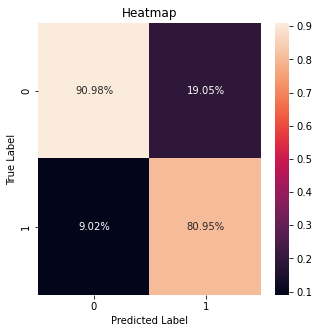

In [13]:
cm_labels = np.unique(y_test_0)

cm_array = confusion_matrix(y_test_0,rl_pred_0)
cv_array_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)
plt.subplots(figsize=(5,5))
ax = sns.heatmap(cv_array_df/np.sum(cv_array_df), fmt='.2%', annot=True, xticklabels=True, yticklabels=True)
ax.set(title="Heatmap",
      xlabel="Predicted Label",
      ylabel="True Label");

#### 4.2.2 Courbe ROC et AUC <a class="anchor" id="section_4_2_2"></a>

Text(0.5, 1.0, 'Courbe ROC')

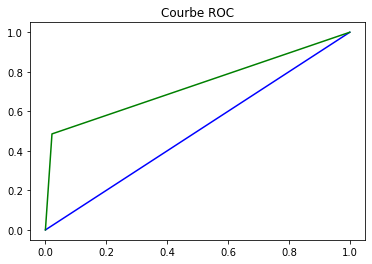

In [14]:
#colonnes pour les courbes ROC
#fpr (false positive rate -- taux de faux positifs) en abscisse #tpr (true positive rate – taux de vrais positifs) en ordonnée #pos_label = 1 pour indiquer la modalité cible
train_fprSm, train_tprSm, _ = metrics.roc_curve(y_test_0,rl_pred_0,pos_label=1)

#graphique -- construire la diagonale de référence
#cas du modèle qui ne fait pas mieux que l’affectation des probabilités #au hasard – notre courbe ne doit pas passer en dessous
#plus il s’en écarte vers le haut, mieux c’est 
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),'b')

#rajouter notre diagramme
plt.plot(train_fprSm,train_tprSm,"g") 

#titre
plt.title("Courbe ROC")

#plt.savefig('ROCtrain_m1.png', bbox_inches='tight');

In [15]:
#valeur de l'AUC
train_aucSm = metrics.roc_auc_score(y_test_0,rl_pred_0)
print("AUC : %.4f" % (train_aucSm))

AUC : 0.7321


Il est possible de caractériser numériquement la courbe ROC en calculant la surface située sous la courbe. C'est le critère AUC. Elle exprime la probabilité de placer un individu positif devant un négatif. Ainsi, dans le cas d'une discrimination parfaite, les positifs sont sûrs d'être placés devant les négatifs, nous avons AU C = 1. A contrario, si le classi􏰁eur attribue des scores au hasard, il y a autant de chances de placer un positif devant un négatif que l'inverse, la courbe ROC se confond avec la première bissectrice, nous avons AUC = 0.5. C'est la situation de référence, notre classifieur doit faire mieux.

| Valeur de l'AUC | Commentaire |
| :---: | :---: |
| AUC = 0,5 | Pas de discrimination |
| 0,7 <= AUC < 0,8 | Discrimination acceptable |
| 0,8 <= AUC < 0,9 | Discrimination excellente |
| AUC >= 0,9 | Discrimination exceptionnelle |

Pour calculer l’AUC (aire sous la courbe), nous faisons appel à la fonction roc_auc_score()

### 4.3 Choix des variables significatives pour le modèle <a class="anchor" id="section_4_3"></a>

In [16]:
feat_n = ['Age',
 'Days_Engaged',
 'Recency',
 'MntTotal',
 'Wines',
 'Fruits',
 'Meat',
 'Fish',
 'Sweets',
 'Gold',
 'TotalPurch',
 'DealsPurch',
 'WebPurch',
 'CatalogPurch',
 'StorePurch',
 'NumWebVisitsMonth',
 'TotalAcc',
 'Income']
feat_c = ['Childhome',
 'Kidhome',
 'Teenhome',
 'AccCmp1',
 'AccCmp2',
 'AccCmp3',
 'AccCmp4',
 'AccCmp5',
 'Complain',
 'Education_Graduation',
 'Education_Master',
 'Education_PhD',
 'Marital_Status_Married', 
 'Marital_Status_Together', 
 'Marital_Status_Single',
 'Marital_Status_Widow']

#### 4.3.1 Chi-squared statistic test <a class="anchor" id="section_4_3_1"></a>

In [17]:
from sklearn.preprocessing import KBinsDiscretizer
from scipy import stats

In [18]:
# Is given as input a dataframe, a list of continuous features names, a list of categorical features names,
# the name of the target feature and returns a dataframe with the discrimination ability of each feature and if
# its p-value is lower than 0.05.
# 10 is the default number of bins and uniform is the strategy used in the binning of continuous features.
def chisq_ranker(df, continuous_flist, categorical_flist, target, n_bins=10, binning_strategy="uniform"):
    chisq_dict = {}
    if  continuous_flist:
        bindisc = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', 
                               strategy=binning_strategy)
        for feature in continuous_flist:            
            feature_bin = bindisc.fit_transform(df[feature].values[:, np.newaxis])
            feature_bin = pd.Series(feature_bin[:, 0], index=df.index)
            cont_tab = pd.crosstab(feature_bin, df[target], margins = False)
            chisq_dict[feature] = stats.chi2_contingency(cont_tab.values)[0:2] 
    if  categorical_flist:
        for feature in categorical_flist:  
            cont_tab = pd.crosstab(df[feature], df[target], margins = False)          
            chisq_dict[feature] = stats.chi2_contingency(cont_tab.values)[0:2]       
    
    df_chi = pd.DataFrame(chisq_dict, index=["Chi-Squared", "p-value"]).transpose()
    df_chi.sort_values("Chi-Squared", ascending=False, inplace=True)
    df_chi["valid"]=df_chi["p-value"]<=0.05
    
    
    return df_chi

In [19]:
df_chisq_rank = chisq_ranker(df_ad, feat_n, feat_c, "Response")

In [20]:
df_chisq_rank.head(15)

,Chi-Squared,p-value,valid
TotalAcc,402.24,0.00,True
AccCmp5,228.47,0.00,True
MntTotal,200.20,0.00,True
AccCmp1,190.72,0.00,True
Wines,164.89,0.00,True
Income,152.05,0.00,True
AccCmp3,138.77,0.00,True
Meat,133.64,0.00,True
CatalogPurch,109.51,0.00,True
Recency,104.91,0.00,True


In [21]:
df_chisq_rank.index

Index(['TotalAcc', 'AccCmp5', 'MntTotal', 'AccCmp1', 'Wines', 'Income',
       'AccCmp3', 'Meat', 'CatalogPurch', 'Recency', 'Days_Engaged',
       'Childhome', 'AccCmp4', 'TotalPurch', 'WebPurch', 'Gold', 'Fruits',
       'AccCmp2', 'Teenhome', 'StorePurch', 'Fish', 'DealsPurch', 'Sweets',
       'Marital_Status_Single', 'NumWebVisitsMonth', 'Age', 'Education_PhD',
       'Kidhome', 'Marital_Status_Married', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Education_Graduation', 'Education_Master',
       'Complain'],
      dtype='object')

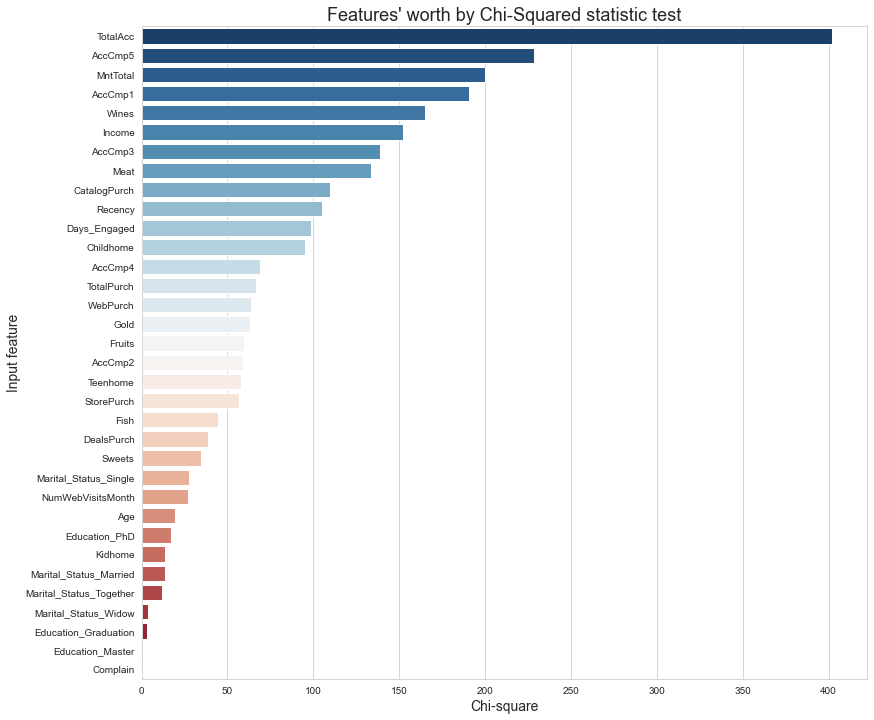

In [22]:
sns.set_style('whitegrid') 

plt.subplots(figsize=(13,12))
pal = sns.color_palette("RdBu_r", len(df_chisq_rank))
rank = df_chisq_rank['Chi-Squared'].argsort().argsort()  

sns.barplot(y=df_chisq_rank.index,x=df_chisq_rank['Chi-Squared'], palette=np.array(pal[::-1])[rank])
plt.title("Features' worth by Chi-Squared statistic test", fontsize=18)
plt.ylabel("Input feature", fontsize=14)
plt.xlabel("Chi-square", fontsize=14)

plt.show()

#### 4.3.2 Stepwise selection <a class="anchor" id="section_4_3_2"></a>

In [23]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = Logit(y, add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = Logit(y, add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X_train_0, y_train_0)

print('resulting features:')
print(result)

<ipython-input-23-e348f4883000>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-23-e348f4883000>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Optimization terminated successfully.
         Current function value: 0.384811
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.421383
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.356883
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.420729
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.416290
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.411354
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.394564
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.418919
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.421268
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.395281
  

<ipython-input-23-e348f4883000>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-23-e348f4883000>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Optimization terminated successfully.
         Current function value: 0.305259
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305026
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305079
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300165
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305354
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304744
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304456
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305371
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302998
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304449
  

<ipython-input-23-e348f4883000>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-23-e348f4883000>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Optimization terminated successfully.
         Current function value: 0.294223
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295023
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294620
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.290975
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.290923
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294982
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294423
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292002
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293150
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295027
  

<ipython-input-23-e348f4883000>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-23-e348f4883000>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Optimization terminated successfully.
         Current function value: 0.280801
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.279937
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.281343
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.278851
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276983
         Iterations 7
Add  Education_PhD                  with p-value 8.26365e-07
Optimization terminated successfully.
         Current function value: 0.274676
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274674
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274238
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273449
         Iterations 7
Optimization terminat

<ipython-input-23-e348f4883000>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-23-e348f4883000>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Optimization terminated successfully.
         Current function value: 0.265195
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.270260
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.270148
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.270059
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.269929
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.270300
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.270230
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.268373
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.267761
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.269743
  

<ipython-input-23-e348f4883000>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-23-e348f4883000>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Optimization terminated successfully.
         Current function value: 0.259131
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.255901
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.258918
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.261246
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.261245
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.258366
         Iterations 8
Add  Marital_Status_Together        with p-value 1.63068e-05
Optimization terminated successfully.
         Current function value: 0.255901
         Iterations 8
Drop Marital_Status_Single          with p-value 0.933702
Optimization terminated successfully.
         Current function value: 0.255890
         Iterations 8
Optimization terminated successfully.
         Current function v

<ipython-input-23-e348f4883000>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


#### 4.3.3 mlxtend SequentialFeatureSelector  <a class="anchor" id="section_4_3_3"></a>

In [24]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [25]:
# Créer un classificateur RF à utiliser dans la sélection des variables
modelo = linear_model.LogisticRegression(max_iter=10000) #lancer les calculs
modelo.fit(X_train_0, y_train_0)
# Build step forward feature selection
sfs1 = sfs(modelo,
           k_features=10,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train_0, y_train_0)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.4s finished

[2022-04-19 13:20:31] Features: 1/10 -- score: 0.8648564254442441[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.5s finished

[2022-04-19 13:20:32] Features: 2/10 -- score: 0.8722411795003863[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s finished

[2022-04-19 13:20:32] Features: 3/10 -- score: 0.8835999871233582[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [26]:
# Quelles variables?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[5, 6, 10, 15, 18, 20, 24, 27, 30, 32]


In [27]:
X_train_01bis = add_constant(X_train_0.iloc[:, feat_cols])

#régression logistique - on passe la cible et les explicatives
modelon = Logit(endog=y_train_0,exog=X_train_01bis) #lancer les calculs

#algorithme de Newton-Raphson utilisé par défaut
#https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.fit.html
res_all = modelon.fit(method='bfgs', maxiter=1000)

Optimization terminated successfully.
         Current function value: 0.263366
         Iterations: 60
         Function evaluations: 61
         Gradient evaluations: 61


In [28]:
print(res_all.summary())

                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1761
Model:                          Logit   Df Residuals:                     1750
Method:                           MLE   Df Model:                           10
Date:                Tue, 19 Apr 2022   Pseudo R-squ.:                  0.3753
Time:                        13:20:37   Log-Likelihood:                -463.79
converged:                       True   LL-Null:                       -742.39
Covariance Type:            nonrobust   LLR p-value:                2.565e-113
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.4675      0.156     -9.418      0.000      -1.773      -1.162
Days_Engaged                0.8915      0.099      9.030      0.000       0.698       1.085


**Amélioration**

In [29]:
#régression logistique - on passe la cible et les explicatives
modelon = Logit(endog=y_train_0,
                exog=X_train_01bis[['const','Days_Engaged', 'Recency','Meat','DealsPurch','StorePurch','TotalAcc',
                                    'Education_Graduation','Marital_Status_Together', 'Marital_Status_Married']]) #lancer les calculs

#algorithme de Newton-Raphson utilisé par défaut
#https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.fit.html
res_all = modelon.fit(method='bfgs', maxiter=1000)

Optimization terminated successfully.
         Current function value: 0.265735
         Iterations: 52
         Function evaluations: 53
         Gradient evaluations: 53


In [30]:
print(res_all.summary())

                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1761
Model:                          Logit   Df Residuals:                     1751
Method:                           MLE   Df Model:                            9
Date:                Tue, 19 Apr 2022   Pseudo R-squ.:                  0.3697
Time:                        13:20:37   Log-Likelihood:                -467.96
converged:                       True   LL-Null:                       -742.39
Covariance Type:            nonrobust   LLR p-value:                1.948e-112
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.5594      0.153    -10.225      0.000      -1.858      -1.261
Days_Engaged                0.8756      0.098      8.980      0.000       0.684       1.067


### 4.4 Dernière modèle <a class="anchor" id="section_4_4"></a>

In [31]:
X_train_01 = X_train_0[['TotalAcc', 'Days_Engaged', 'Recency', 'Meat', 'StorePurch', 'Education_PhD',
                        'Teenhome', 'DealsPurch', 'Marital_Status_Married', 'Marital_Status_Together']]

X_test_01 = X_test_0[['TotalAcc', 'Days_Engaged', 'Recency', 'Meat', 'StorePurch','Education_PhD',
                      'Teenhome', 'DealsPurch', 'Marital_Status_Married', 'Marital_Status_Together']]

In [32]:
rl_01 = linear_model.LogisticRegression(max_iter=10000)
rl_01.fit(X_train_01, y_train_0)
rl_pred_01 = rl_01.predict(X_test_01)
print(classification_report(y_test_0, rl_pred_01))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       371
           1       0.82      0.47      0.60        70

    accuracy                           0.90       441
   macro avg       0.87      0.73      0.77       441
weighted avg       0.89      0.90      0.89       441



In [33]:
#Add constant
X_train_1bis = add_constant(X_train_01)

#régression logistique - on passe la cible et les explicatives
modelon = Logit(endog=y_train_0,exog= X_train_1bis)#lancer les calculs

#algorithme de Newton-Raphson utilisé par défaut
#https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.fit.html
res_final = modelon.fit(method='bfgs', maxiter=1000)

Optimization terminated successfully.
         Current function value: 0.255903
         Iterations: 57
         Function evaluations: 58
         Gradient evaluations: 58


#### 4.4.1 Model summary <a class="anchor" id="section_4_4_1"></a>

In [34]:
print(res_final.summary())

                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1761
Model:                          Logit   Df Residuals:                     1750
Method:                           MLE   Df Model:                           10
Date:                Tue, 19 Apr 2022   Pseudo R-squ.:                  0.3930
Time:                        13:20:37   Log-Likelihood:                -450.64
converged:                       True   LL-Null:                       -742.39
Covariance Type:            nonrobust   LLR p-value:                6.043e-119
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.1329      0.153    -13.966      0.000      -2.432      -1.834
TotalAcc                    1.1293      0.088     12.855      0.000       0.957       1.301


### 4.5 Évaluation du dernière modèle <a class="anchor" id="section_4_5"></a>
#### 4.5.1 Matrice de confusion <a class="anchor" id="section_4_5_1"></a>

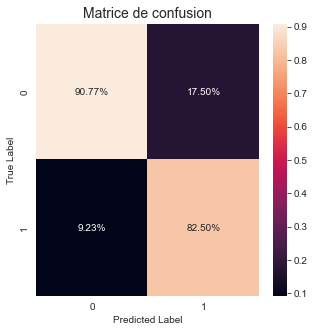

In [35]:
cm_labels = np.unique(y_test_0)

cm_array = confusion_matrix(y_test_0,rl_pred_01)
cv_array_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)
plt.subplots(figsize=(5,5))
ax = sns.heatmap(cv_array_df/np.sum(cv_array_df), fmt='.2%', annot=True, xticklabels=True, yticklabels=True)
ax.set(xlabel="Predicted Label",
      ylabel="True Label")
plt.title("Matrice de confusion", fontsize=14)
plt.savefig('Graphiques/MC.png', bbox_inches='tight');

#### 4.5.2 Courbe ROC et AUC <a class="anchor" id="section_4_5_2"></a>

Text(0.5, 1.0, 'Courbe ROC')

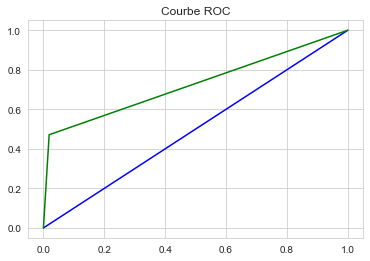

In [36]:
#colonnes pour les courbes ROC
#fpr (false positive rate -- taux de faux positifs) en abscisse #tpr (true positive rate – taux de vrais positifs) en ordonnée #pos_label = 1 pour indiquer la modalité cible
train_fprSm, train_tprSm, _ = metrics.roc_curve(y_test_0,rl_pred_01,pos_label=1)

#graphique -- construire la diagonale de référence
#cas du modèle qui ne fait pas mieux que l’affectation des probabilités #au hasard – notre courbe ne doit pas passer en dessous
#plus il s’en écarte vers le haut, mieux c’est 
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),'b')

#rajouter notre diagramme
plt.plot(train_fprSm,train_tprSm,"g") 

#titre
plt.title("Courbe ROC")

#plt.savefig('ROCtrain_m1.png', bbox_inches='tight');

In [37]:
#valeur de l'AUC
train_aucSm = metrics.roc_auc_score(y_test_0,rl_pred_01)
print("AUC : %.4f" % (train_aucSm))

AUC : 0.7263


#### 4.5.3 Test de significativité globale de la régression <a class="anchor" id="section_4_5_3"></a>

Il s’agit de vérifier si les coefficients, à l’exception de la constante, sont tous simultanément nuls.

Via les comparaisons des critères AIC et BIC

Confronter les critères AIC ou BIC du modèle étudié avec ceux du modèle trivial (null modèle).

Si (AIC_modèle < AIC_null), nous pouvons conclure que notre modèle est globalement pertinent (idem pour le critère BIC).

Critère AIC. L’AIC du modèle est restituée par une des propriétés de l’objet. Nous devons en revanche calculer l’AIC_null à partir de la log-vraisemblance du modèle trivial.

In [38]:
#AIC du modèle
print("AIC du modèle : %.4f" % (res_final.aic))

#AIC du modèle trivial - 1 seul param. estimé, la constante
aic_null = (-2) * res_final.llnull + 2 * (1)
print("AIC du modèle trivial : %.4f" % (aic_null))

AIC du modèle : 923.2900
AIC du modèle trivial : 1486.7859


Apparemment, notre modèle est globalement pertinent.

Critère BIC. Nous pouvons adopter la même démarche pour le critère BIC. Ce dernier a la particularité de pénaliser davantage la complexité (le nombre de paramètres à estimer). Il nous indique que le modèle n’est pas si pertinent que cela finalement.

In [39]:
#BIC du modèle
print("BIC du modèle : %.4f" % (res_final.bic))
#BIC du modèle trivial - 1 seul param. estimé, la constante
bic_null = (-2) * res_final.llnull + np.log(X_train_01.shape[0]) * (1)
print("BIC du modèle trivial : %.4f" % (bic_null))

BIC du modèle : 983.5000
BIC du modèle trivial : 1492.2596


### 4.6 Explication du model par Shapley <a class="anchor" id="section_4_6"></a>

La valeur de Shap proposée par Lundberg et al. [4] est la valeur SHapley Additive exPlanation. L’idée proposée par ces auteurs est de calculer la valeur de Shapley pour toutes les variables à chaque exemple du dataset. Cette approche explique la sortie d’un modèle par la somme des effets de chaque variable Xi. Ils se basent sur la valeur de Shapley qui provient de la théorie des jeux. L’idée est de moyenner l’impact qu’une variable a pour toutes les combinaisons de variables possibles.

In [40]:
from shapash.explainer.smart_explainer import SmartExplainer
xpl = SmartExplainer()
df_y_pred_0 = pd.DataFrame(rl_pred_01, columns=['pred'],index= X_test_01.index)
xpl.compile(x=X_test_01, model=rl_01, y_pred= df_y_pred_0)
xpl.run_app(port=8051)

Backend: Shap LinearExplainer
Dash is running on http://0.0.0.0:8051/



/Users/facundoalcala/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:1549: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.

INFO:root:Your Shapash application run on http://Air-de-Facundo:8051/
INFO:root:Use the method .kill() to down your app.
INFO:shapash.webapp.smart_app:Dash is running on http://0.0.0.0:8051/



<CustomThread(Thread-4, started 13088944128)>

 * Serving Flask app "shapash.webapp.smart_app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


In [41]:
import shap
explainer = shap.LinearExplainer(rl_01,masker=shap.maskers.Impute(data=X_test_01),
                           feature_names=X_test_01.columns, algorithm="linear")
shap_values = explainer(X_test_01)

Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

INFO:werkzeug: * Running on http://0.0.0.0:8051/ (Press CTRL+C to quit)


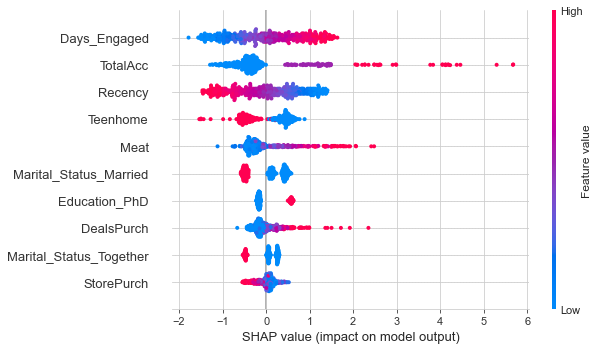

In [42]:
shap.summary_plot(shap_values, X_test_01)

### 4.7 Taille du Train / Test split set <a class="anchor" id="section_4_7"></a>

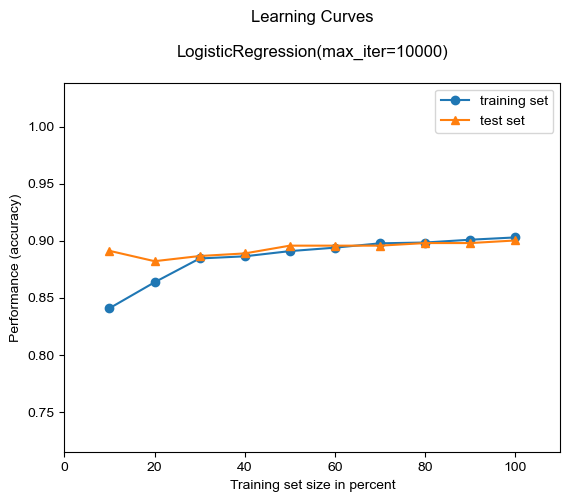

In [43]:
from mlxtend.plotting import plot_learning_curves
#Modele complet
plot_learning_curves(X_train_01, y_train_0, X_test_01, y_test_0, rl_01, scoring='accuracy')
plt.show()

## Annexes: Stratégies d’échantillonnage <a class="anchor" id="chapterA"></a>

Dans ce Dataset, il existe un déséquilibre des classes(classification déséquilibrée, imbalanced, mal balancé, skewed). Il signifie qu'une classe dans un problème de classification est sous-représentée par rapport aux autres et que le modèle de machine learning n'est pas suffisamment pénalisé s'il n'en tient pas compte.

### A1 SMOTE <a class="anchor" id="section_A_1"></a>

In [44]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X_train_01, y_train_0)

In [45]:
print(y_smote.value_counts())

0    1498
1    1498
Name: Response, dtype: int64


In [46]:
rl_smote = linear_model.LogisticRegression(max_iter=10000)
rl_smote.fit(x_smote, y_smote)
rl_pred_smote = rl_smote.predict(X_test_01)
print(classification_report(y_test_0, rl_pred_smote))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       371
           1       0.51      0.81      0.63        70

    accuracy                           0.85       441
   macro avg       0.73      0.83      0.76       441
weighted avg       0.89      0.85      0.86       441



In [47]:
#valeur de l'AUC
smote_aucSm = metrics.roc_auc_score(y_test_0,rl_pred_smote)
print("AUC : %.4f" % (smote_aucSm))

AUC : 0.8330


### A2 Sampling Response 0 in 4 <a class="anchor" id="section_A_2"></a>

In [48]:
#Refaire le df entre x et y
frames1 = [X_train_01, y_train_0]
train = pd.concat(frames1, 1)
train

,TotalAcc,Days_Engaged,Recency,Meat,StorePurch,Education_PhD,Teenhome,DealsPurch,Marital_Status_Married,Marital_Status_Together,Response
ID,,,,,,,,,,,
5735,1.03,-1.08,-0.69,3.44,1.29,0,-0.93,-0.71,0,0,0
4587,-0.44,-0.04,1.42,-0.52,0.36,0,-0.93,-0.71,0,0,0
946,-0.44,1.44,1.49,-0.52,-0.26,0,-0.93,-0.16,0,1,0
8923,-0.44,0.41,-1.28,2.60,0.36,0,-0.93,-0.71,0,0,1
4769,1.03,-1.69,0.10,-0.65,0.05,0,0.91,2.57,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
10486,-0.44,0.21,0.17,-0.02,0.67,0,-0.93,-0.71,1,0,0
4418,-0.44,0.67,-0.45,2.25,1.91,0,-0.93,-0.71,0,0,1
9905,1.03,-0.01,0.69,-0.57,-0.87,0,0.91,1.48,0,1,0


In [49]:
#Séparer les réponses 1 et 0
train_R1 = train[train['Response'] == 1]
train_R0 = train.drop(train_R1.index)

In [50]:
#Diviser en 4 parts les réponses 0
part_1 = train_R0.sample(frac = 0.25)
train_R0.drop(part_1.index, inplace=True)

part_2 = train_R0.sample(n = 375)
train_R0.drop(part_2.index, inplace=True)

part_3 = train_R0.sample(n = 375)

part_4 = train_R0.drop(part_3.index)

In [51]:
#Unir les réponses 1 et 0
frames1 = [train_R1, part_1]

e_1 = pd.concat(frames1)

frames2 = [train_R1, part_2]
e_2 = pd.concat(frames2)

frames3 = [train_R1, part_3]
e_3 = pd.concat(frames3)

frames4 = [train_R1, part_4]
e_4 = pd.concat(frames4)

#### Essayer les models

In [52]:
#e1

#y (is_genuine) est la première colonne
y_e1 = e_1['Response']
#X (les autres) sont les variables qui suivent la première
X_e1 = e_1.drop(['Response'], 1)
#comptage des modalités de y
print(y_e1.value_counts())

#MODEL E1
rl_e1 = linear_model.LogisticRegression(max_iter=10000)
rl_e1.fit(X_e1, y_e1)
rl_pred_e1 = rl_e1.predict(X_test_01)
print(classification_report(y_test_0, rl_pred_e1))

#e2

#y (is_genuine) est la première colonne
y_e2 = e_2['Response']

#X (les autres) sont les variables qui suivent la première
X_e2 = e_2.drop(['Response'], 1)

#MODEL E2
rl_e2 = linear_model.LogisticRegression(max_iter=10000)
rl_e2.fit(X_e2, y_e2)
rl_pred_e2 = rl_e2.predict(X_test_01)
print(classification_report(y_test_0, rl_pred_e2))

#e3

#y (is_genuine) est la première colonne
y_e3 = e_3['Response']

#X (les autres) sont les variables qui suivent la première
X_e3 = e_3.drop(['Response'], 1)

#MODEL E3
rl_e3 = linear_model.LogisticRegression(max_iter=10000)
rl_e3.fit(X_e3, y_e3)
rl_pred_e3 = rl_e3.predict(X_test_01)
print(classification_report(y_test_0, rl_pred_e3))

#e4

#y (is_genuine) est la première colonne
y_e4 = e_4['Response']

#X (les autres) sont les variables qui suivent la première
X_e4 = e_4.drop(['Response'], 1)

#MODEL E4
rl_e4 = linear_model.LogisticRegression(max_iter=10000)
rl_e4.fit(X_e4, y_e4)
rl_pred_e4 = rl_e4.predict(X_test_01)
print(classification_report(y_test_0, rl_pred_e4))

0    374
1    263
Name: Response, dtype: int64
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       371
           1       0.50      0.76      0.61        70

    accuracy                           0.84       441
   macro avg       0.73      0.81      0.75       441
weighted avg       0.88      0.84      0.86       441

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       371
           1       0.48      0.76      0.59        70

    accuracy                           0.83       441
   macro avg       0.71      0.80      0.74       441
weighted avg       0.87      0.83      0.84       441

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       371
           1       0.49      0.77      0.60        70

    accuracy                           0.83       441
   macro avg       0.72      0.81      0.75       441
weighted avg       0.88    

On n'a pas d'améliorations ni avec SMOTE ni avec cette dernière technique.